Merged dataset preview:
   Year     Province  Harvested_ha  Production_padi_ton  Production_beras_ton  \
0  2020       Banten      139000.0             486200.0              286000.0   
1  2020  DKI Jakarta        2800.0              14000.0                8000.0   
2  2020  Jawa Tengah     1690000.0            9460000.0             5600000.0   
3  2020   Jawa Timur     1780000.0           10190000.0             6000000.0   
4  2021       Banten      133700.0             545000.0              321000.0   

   Yield_ton_per_ha  Avg_rain_mm  
0             3.498    11.222759  
1             5.000    11.317850  
2             5.598    11.380311  
3             5.725     7.898983  
4             4.076    12.376201  
Overall correlation between rainfall and rice yield = -0.209

Correlation per Province:
 Province                     
Banten       Yield_ton_per_ha   -0.499775
DKI Jakarta  Yield_ton_per_ha   -0.833392
Jawa Tengah  Yield_ton_per_ha   -0.533601
Jawa Timur   Yield_ton_per_ha   -0

c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


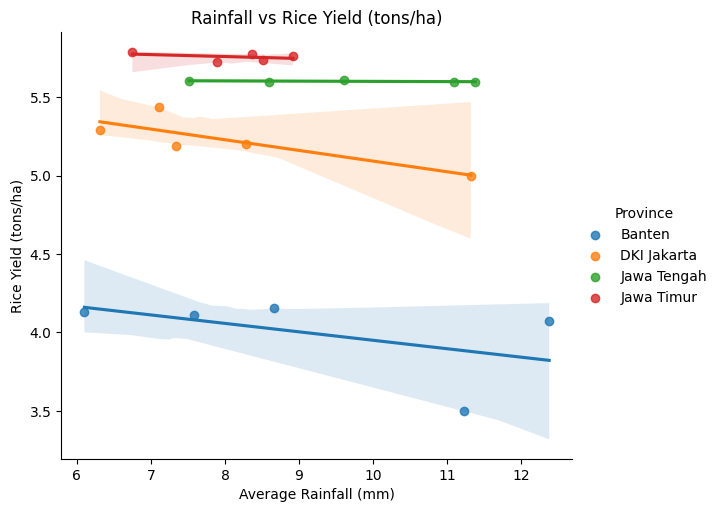

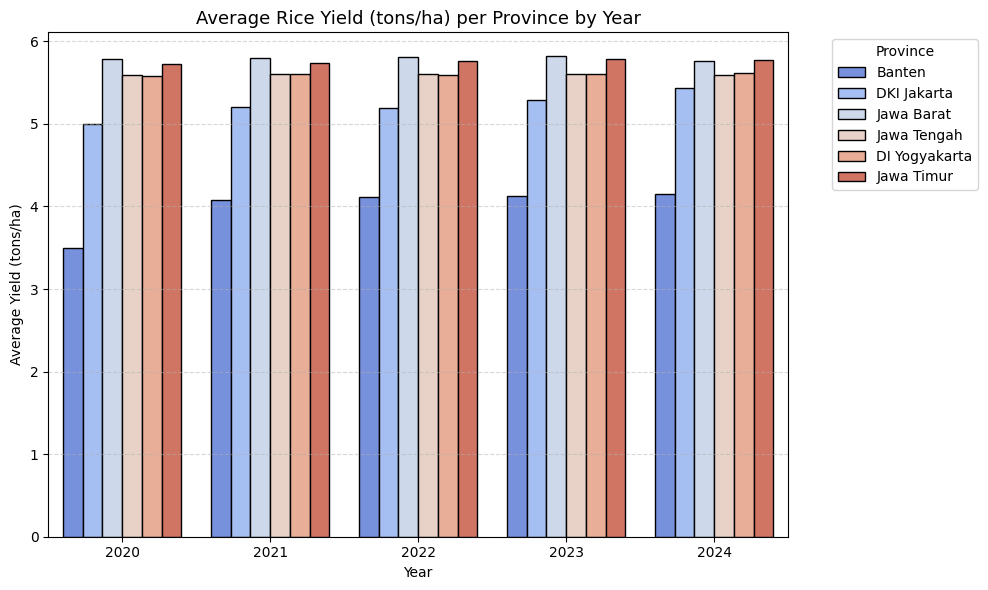

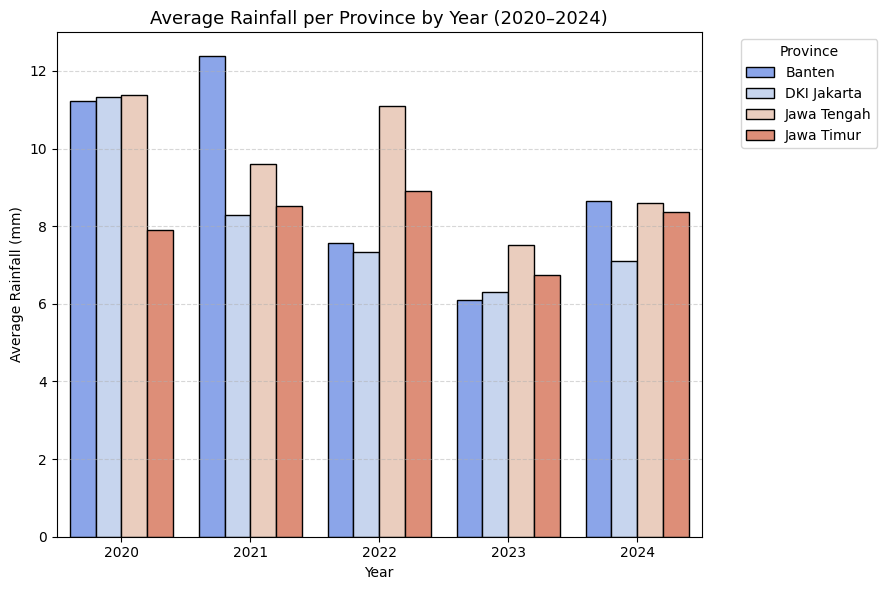

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load both datasets
rain = pd.read_excel("Cleaned_Rainfall_Data_Java.xlsx")
padi = pd.read_excel("./Padi/Padi/Datapadi_Laporan.xlsx")

# --- Clean rainfall ---
rain["Province"] = rain["Province"].astype(str).str.strip()
rain["Year"] = pd.to_numeric(rain["Year"], errors="coerce").astype("Int64")
rain["Avg_rain_mm"] = pd.to_numeric(rain["Avg_rain_mm"], errors="coerce")

# --- Clean padi ---
padi.columns = ["Year", "Province", "Harvested_ha", "Production_padi_ton", "Production_beras_ton"]
for col in ["Harvested_ha", "Production_padi_ton", "Production_beras_ton"]:
    padi[col] = (padi[col].astype(str)
                          .str.replace(".", "", regex=False)
                          .astype(float))

# Compute yield (ton/ha)
padi["Yield_ton_per_ha"] = (padi["Production_padi_ton"] / padi["Harvested_ha"]).round(3)

# Align province names
padi["Province"] = padi["Province"].replace({
    "Jawa Barat": "Jawa Barat",
    "Jawa Tengah": "Jawa Tengah",
    "Jawa Timur": "Jawa Timur",
    "Banten": "Banten",
    "DKI Jakarta": "DKI Jakarta",
    "DI Yogyakarta": "DI Yogyakarta"
})

# rain_avg = rain.groupby(["Province","Year"])["Avg_rain_mm"].mean().reset_index()
# sns.lineplot(data=rain_avg, x="Year", y="Avg_rain_mm", hue="Province", marker="o")
# plt.title("Average Yearly Rainfall per Province (Java Island)")
# plt.ylabel("Average Rainfall (mm)")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.show()

# sns.lineplot(data=padi, x="Year", y="Yield_ton_per_ha", hue="Province", marker="o", palette="crest")
# plt.title("Rice Yield (tons/ha) per Province")
# plt.ylabel("Yield (tons/ha)")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.show()

rain_grouped = rain.groupby(["Province", "Year"])["Avg_rain_mm"].mean().reset_index()
merged = pd.merge(padi, rain_grouped, on=["Province", "Year"], how="inner")

print("Merged dataset preview:")
print(merged.head())

# Correlation check
corr = merged["Yield_ton_per_ha"].corr(merged["Avg_rain_mm"])
print(f"Overall correlation between rainfall and rice yield = {corr:.3f}")

# Province-wise correlation
corr_table = merged.groupby("Province")[["Yield_ton_per_ha", "Avg_rain_mm"]].corr().iloc[0::2, -1]
print("\nCorrelation per Province:\n", corr_table)

sns.lmplot(data=merged, x="Avg_rain_mm", y="Yield_ton_per_ha", hue="Province", aspect=1.2)
plt.title("Rainfall vs Rice Yield (tons/ha)")
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Rice Yield (tons/ha)")
plt.show()

# # ====== Improved visualization for rice yield ======

# # --- Cleaner line plot (legend outside, subtle grid) ---
# plt.figure(figsize=(9,6))
# sns.lineplot(data=padi, x="Year", y="Yield_ton_per_ha", hue="Province", marker="o", linewidth=2.2)
# plt.title("Rice Yield (tons/ha) per Province (2020–2024)", fontsize=13)
# plt.ylabel("Yield (tons/ha)")
# plt.xlabel("Year")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True)
# plt.tight_layout()
# plt.show()

# --- Bar plot to visualize change per province & year ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=padi, x="Year", y="Yield_ton_per_ha", hue="Province",
    palette="coolwarm", edgecolor="black"
)
plt.title("Average Rice Yield (tons/ha) per Province by Year", fontsize=13)
plt.ylabel("Average Yield (tons/ha)")
plt.xlabel("Year")
plt.legend(title="Province", bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# # --- Optional: Combine rainfall and yield trends in one frame (to visualize correlation) ---
# merged_plot = merged.groupby(["Year", "Province"])[["Avg_rain_mm", "Yield_ton_per_ha"]].mean().reset_index()

# fig, ax1 = plt.subplots(figsize=(10,6))
# sns.lineplot(data=merged_plot, x="Year", y="Avg_rain_mm", hue="Province", marker="o", ax=ax1)
# ax1.set_ylabel("Average Rainfall (mm)", color="blue")
# ax1.tick_params(axis='y', labelcolor="blue")
# ax1.set_title("Rainfall vs. Rice Yield Trend (Dual-Axis Comparison)")

# ax2 = ax1.twinx()
# sns.lineplot(data=merged_plot, x="Year", y="Yield_ton_per_ha", hue="Province", marker="s", linestyle="--", ax=ax2, legend=False)
# ax2.set_ylabel("Rice Yield (tons/ha)", color="green")
# ax2.tick_params(axis='y', labelcolor="green")

# plt.tight_layout()
# plt.show()

# --- Average yearly rainfall per province ---
rain_bar = rain.groupby(["Province","Year"])["Avg_rain_mm"].mean().reset_index()

plt.figure(figsize=(9,6))
sns.barplot(
    data=rain_bar, x="Year", y="Avg_rain_mm", hue="Province",
    palette="coolwarm", edgecolor="black"
)
plt.title("Average Rainfall per Province by Year (2020–2024)", fontsize=13)
plt.ylabel("Average Rainfall (mm)")
plt.xlabel("Year")
plt.legend(title="Province", bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
